In [4]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from timm import create_model

# ÎåÄÏÉÅ Ïù¥ÎØ∏ÏßÄ 6Ïû• (Ï†ïÎãµ 3 + Ïò§Îãµ 3)
selected_images = [
    {"filename": "003.jpg", "true": "light", "pred": "light"},
    {"filename": "002.jpg", "true": "medium", "pred": "medium"},
    {"filename": "004.jpg", "true": "heavy", "pred": "heavy"},
    {"filename": "007.jpg", "true": "heavy", "pred": "light"},
    {"filename": "026.jpg", "true": "heavy", "pred": "medium"},
    {"filename": "019.jpg", "true": "light", "pred": "medium"},
]

# Í≤ΩÎ°ú ÏÑ§Ï†ï
img_dir = "./train_images"  # ÌïÑÏöî Ïãú Ï†àÎåÄÍ≤ΩÎ°úÎ°ú ÏàòÏ†ï
save_dir = "./gradcam_outputs"
os.makedirs(save_dir, exist_ok=True)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = create_model("regnety_002", pretrained=True)
model.eval()

# GradCAM Ï§ÄÎπÑ
cam_extractor = GradCAM(model)

# Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ÏãúÍ∞ÅÌôî ÏßÑÌñâ
for item in selected_images:
    fname = item["filename"]
    img_path = os.path.join(img_dir, fname)

    # Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)

    # Forward (gradient ÌïÑÏöî)
    out = model(input_tensor)
    pred_class = out.squeeze(0).argmax().item()

    # Grad-CAM Îßµ Ï∂îÏ∂ú
    activation_map = cam_extractor(pred_class, out)[0]

    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î≥µÏõê
    input_image = to_pil_image(input_tensor.squeeze(0) * 0.5 + 0.5)

    # CAM ÏãúÍ∞ÅÌôî
    cam_pil = to_pil_image(activation_map)
    result = overlay_mask(input_image, cam_pil, alpha=0.6)

    # Ï†ÄÏû•
    label = f"GT_{item['true']}_Pred_{item['pred']}"
    result.save(os.path.join(save_dir, f"{label}_{fname}"))

print("‚úÖ Grad-CAM ÏãúÍ∞ÅÌôî ÏôÑÎ£å. Í≤∞Í≥ºÎäî 'gradcam_outputs/' Ìè¥ÎçîÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


‚úÖ Grad-CAM ÏãúÍ∞ÅÌôî ÏôÑÎ£å. Í≤∞Í≥ºÎäî 'gradcam_outputs/' Ìè¥ÎçîÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


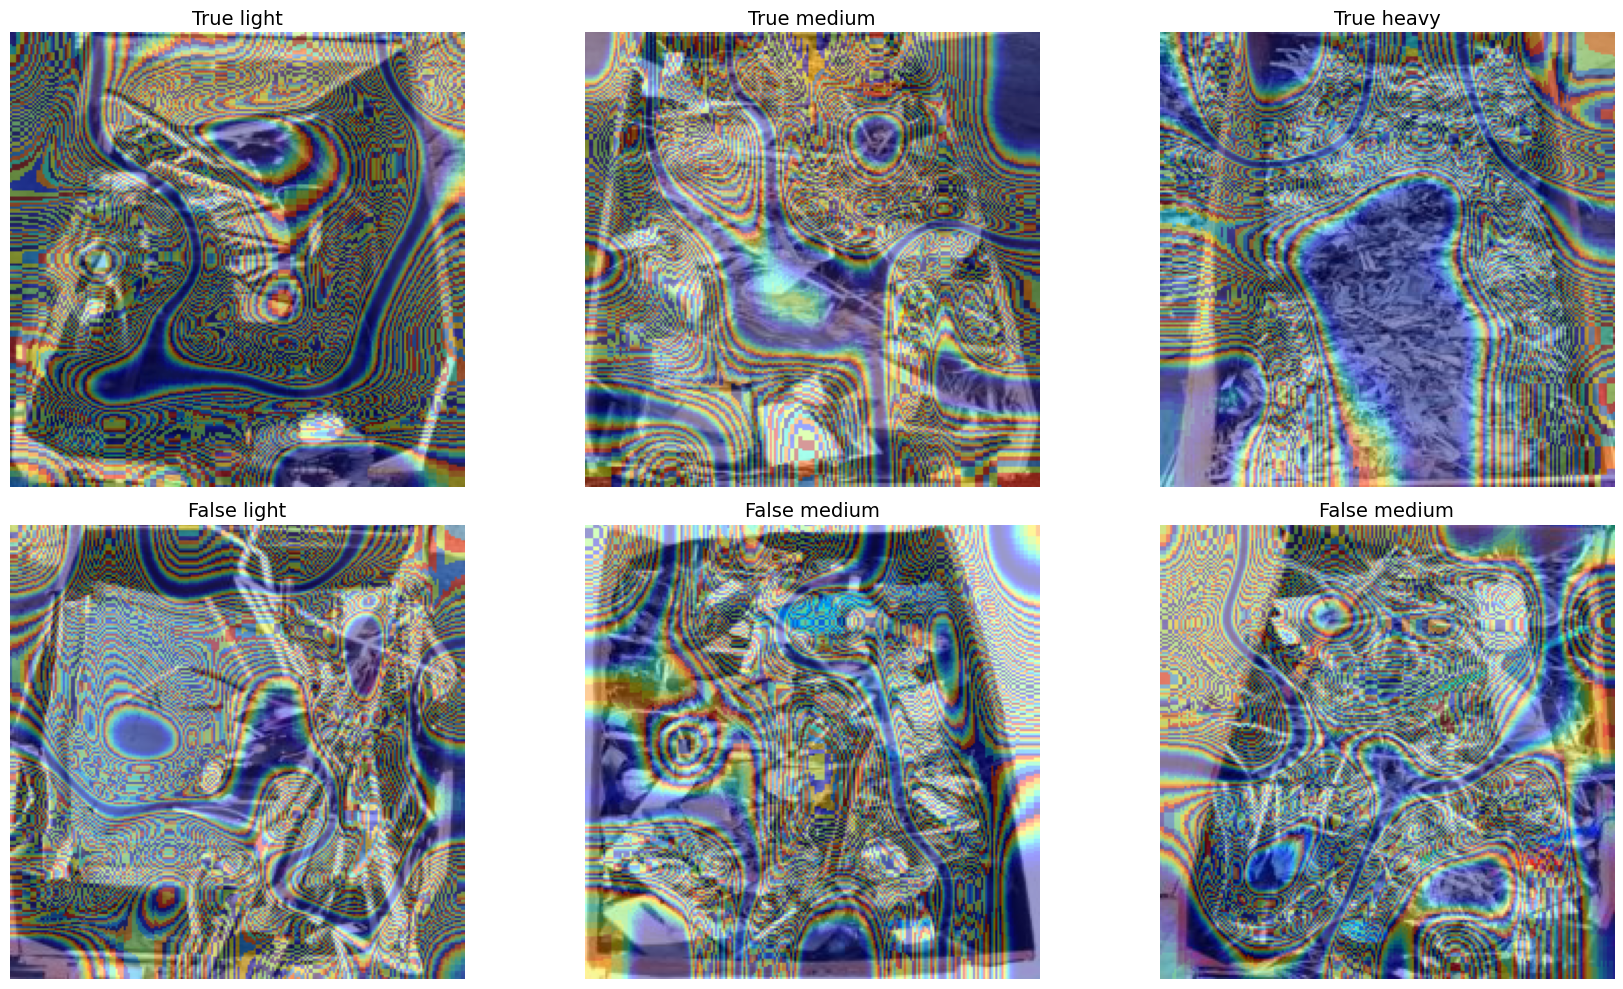

In [5]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from timm import create_model

# ‚¨áÔ∏è Ïù¥ÎØ∏ÏßÄ Ï†ïÎ≥¥ (Ï†ïÎãµ/Ïò§Îãµ Ìè¨Ìï®)
selected_images = [
    {"filename": "003.jpg", "true": "light", "pred": "light"},
    {"filename": "002.jpg", "true": "medium", "pred": "medium"},
    {"filename": "004.jpg", "true": "heavy", "pred": "heavy"},
    {"filename": "007.jpg", "true": "heavy", "pred": "light"},
    {"filename": "026.jpg", "true": "heavy", "pred": "medium"},
    {"filename": "019.jpg", "true": "light", "pred": "medium"},
]

# ‚¨áÔ∏è Í≤ΩÎ°ú ÏÑ§Ï†ï (ÌïÑÏöî Ïãú Ï†àÎåÄÍ≤ΩÎ°úÎ°ú ÏàòÏ†ï)
img_dir = "./train_images"

# ‚¨áÔ∏è Î™®Îç∏ ÏÑ§Ï†ï (CPU Í∞ïÏ†ú ÏÑ§Ï†ï)
device = torch.device("cpu")
model = create_model("regnety_002", pretrained=True).to(device)
model.eval()

# ‚¨áÔ∏è Grad-CAM ÏÑ§Ï†ï
cam_extractor = GradCAM(model)

# ‚¨áÔ∏è Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ‚¨áÔ∏è ÏãúÍ∞ÅÌôî ÏãúÏûë
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, item in enumerate(selected_images):
    fname = item["filename"]
    img_path = os.path.join(img_dir, fname)

    # üîπ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    # üîπ ÏòàÏ∏°
    out = model(input_tensor)
    pred_class = out.squeeze(0).argmax().item()

    # üîπ CAM Îßµ Ï∂îÏ∂ú
    activation_map = cam_extractor(pred_class, out)[0].cpu()

    # üîπ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î≥µÏõê
    input_image = to_pil_image(input_tensor.squeeze(0).cpu() * 0.5 + 0.5)

    # üîπ CAM ÏãúÍ∞ÅÌôî Î∞è Overlay
    cam_pil = to_pil_image(activation_map)
    result = overlay_mask(input_image, cam_pil, alpha=0.6)

    # üîπ ÌëúÏãú
    label_prefix = "True" if item["true"] == item["pred"] else "False"
    axes[idx].imshow(result)
    axes[idx].axis("off")
    axes[idx].set_title(f"{label_prefix} {item['pred']}", fontsize=14)

plt.tight_layout()
plt.show()
